In [2]:

from feature_selector import FeatureSelector

import pandas as pd

In [6]:
train = pd.read_csv('application_test.csv')
train_labels = train['NAME_CONTRACT_TYPE']
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fs = FeatureSelector(data = train, labels = train_labels)

In [8]:
fs.identify_missing(missing_threshold = 0.6)

17 features with greater than 0.60 missing values.



In [9]:
fs.missing_stats.head()

,missing_fraction
COMMONAREA_AVG,0.687161
COMMONAREA_MODE,0.687161
COMMONAREA_MEDI,0.687161
NONLIVINGAPARTMENTS_AVG,0.684125
NONLIVINGAPARTMENTS_MODE,0.684125


In [11]:
missing_features = fs.ops['missing']
missing_features[:5]

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG']

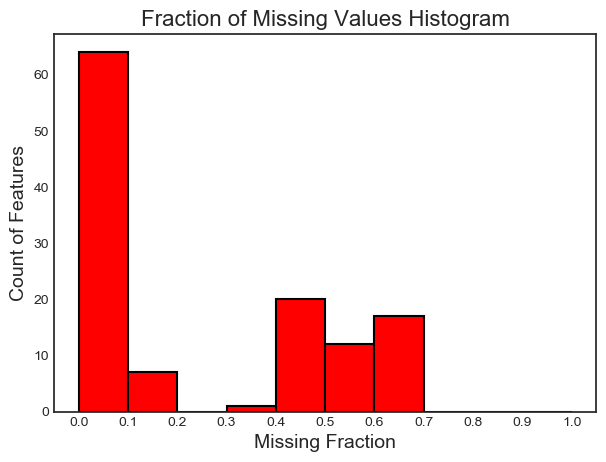

In [12]:
fs.plot_missing()

In [13]:
fs.identify_collinear(correlation_threshold = 0.98)

21 features with a correlation magnitude greater than 0.98.



In [15]:
collinear_features = fs.ops['collinear']

In [16]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,AMT_GOODS_PRICE,AMT_CREDIT,0.988056
1,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999830
2,YEARS_BUILD_MODE,YEARS_BUILD_AVG,0.990502
3,ELEVATORS_MODE,ELEVATORS_AVG,0.981398
4,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985146


TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

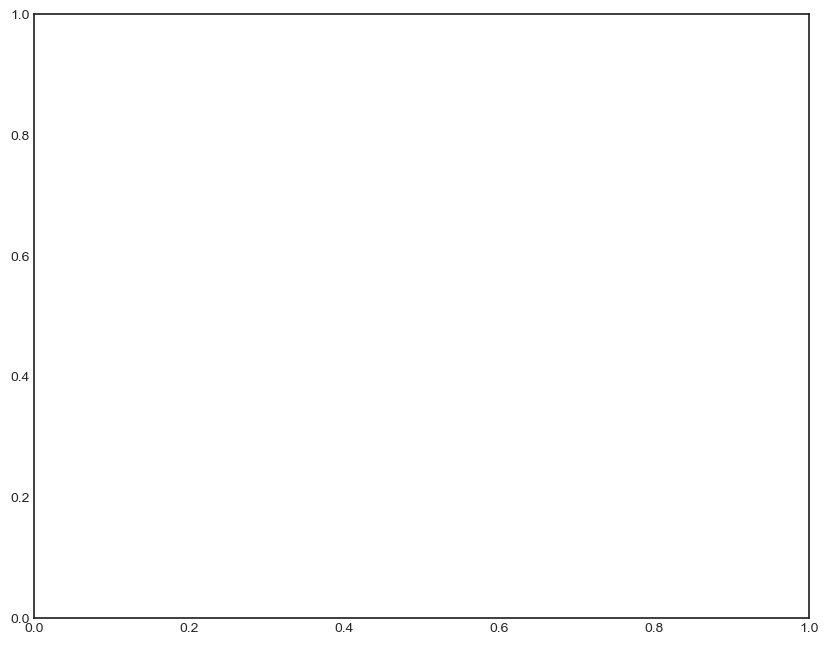

In [17]:
fs.plot_collinear(plot_all = True)